In [83]:
import GPUtil
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 |  0% | 69% |
|  1 |  0% |  0% |
|  2 | 78% | 97% |
|  3 |  0% |  8% |


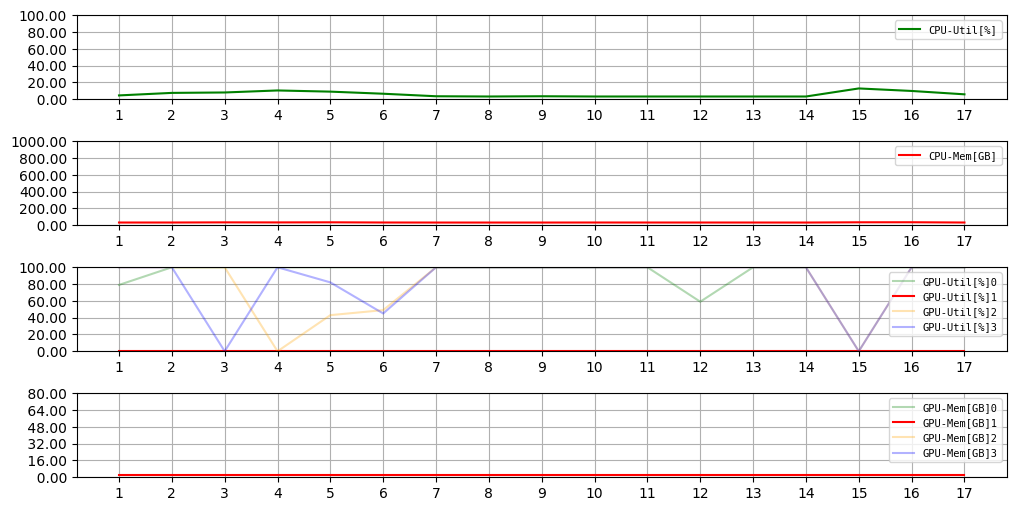

KeyboardInterrupt: 

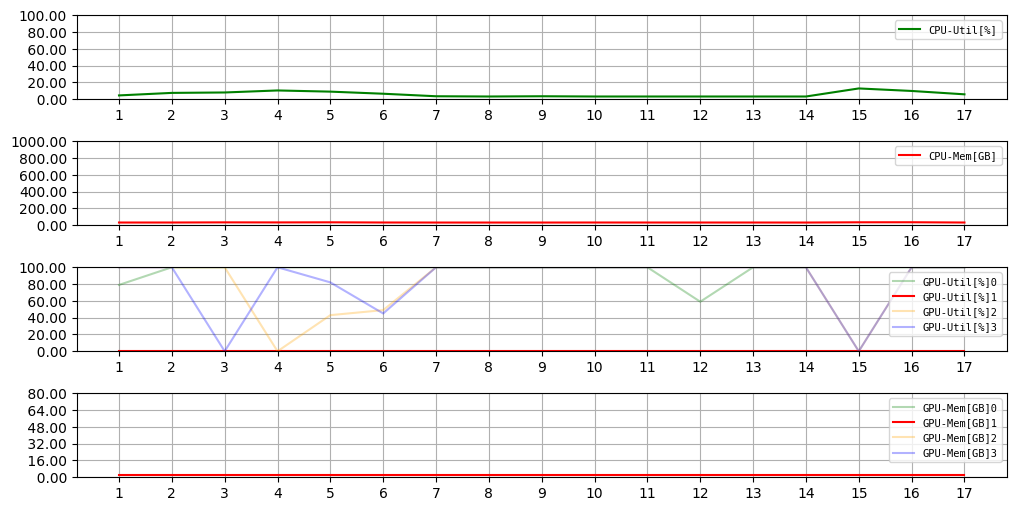

In [244]:
# Get system resource info and plot them neatly

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import clear_output, display
import numpy as np
import psutil
import GPUtil
import time

fig, axs = plt.subplots(4, 1, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)

interval = 1 # Set the interval in seconds for data collection
timestamps, cpu_data, memory_data, gpu_memory_data, gpu_utilization_data = [], [], [], [], []

i = 0
while (True):    
    timestamp = i + 1    
    cpu_percent = psutil.cpu_percent(interval=None)
    memory_usage = psutil.virtual_memory().used / (1024 ** 3)  # in GB #.virtual_memory().percent
    gpus = GPUtil.getGPUs()
    gpu_memory = [gpu.memoryUsed for gpu in gpus] # this one is a list
    gpu_utilization = [gpu.load*100 for gpu in gpus] # this one is a list

    timestamps.append(timestamp)
    cpu_data.append(cpu_percent)
    memory_data.append(memory_usage)
    gpu_memory_data.append(gpu_memory) # list of 4-len-lists
    gpu_utilization_data.append(gpu_utilization) # list of 4-len-lists

    kln = 60 # keep the last n data points
    timestamps = timestamps[-kln:]
    cpu_data = cpu_data[-kln:]
    memory_data = memory_data[-kln:]
    gpu_memory_data = gpu_memory_data[-kln:] # works fine with list of lists # shape: Nx4
    gpu_utilization_data = gpu_utilization_data[-kln:] # works fine with list of lists # shape: Nx4

    DATAX = [cpu_data, memory_data, gpu_utilization_data, gpu_memory_data]
    LABEL = ['CPU-Util[%]', 'CPU-Mem[GB]', 'GPU-Util[%]', 'GPU-Mem[GB]']
    COLOR = ['green', 'red', 'orange', 'blue']
    LIMIT = [[0,100],[0,1000],[0,100],[0,80]]

    clear_output(wait=True)    
    for k, ax in enumerate(axs): # Iterate over the subplots
        
        ax.clear() # Remove data already added to the axes        
        if   k< 2: ax.plot(timestamps, DATAX[k], color=COLOR[k], label=LABEL[k])
        elif k>=2:
            for j in range(len(DATAX[k][0])): # if there are more than 4 gpus, COLOR will spit error
                ax.plot(timestamps, [x[j] for x in DATAX[k]], color=COLOR[j],
                        label=LABEL[k]+str(j), alpha=1 if j==1 else 0.3)

        ax.legend(prop={'family': 'monospace', 'size': 7.5}, loc='upper right')
        ax.set_ylim(LIMIT[k][0], None) # LIMIT[k][1] ####
        KLIMIT = [np.ceil(x) for x in ax.get_ylim()]
        
        # Create evenly spaced gridlines
        x_ticks = timestamps
        y_ticks = np.linspace(KLIMIT[0], KLIMIT[1], num=6)
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(['{:6.2f}'.format(x) for x in ax.get_yticks()])
        ax.grid(True, which='both')
        # Remove spines: ax.spines['left'].set_visible(False) #right #top #bottom

    display(fig)
    time.sleep(interval)
    i += 1